In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
target = 'Depression'

In [3]:
df_train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [4]:
print(f'There are {df_train.shape[0]} rows and {df_train.shape[1]} columns.')

There are 140700 rows and 20 columns.


In [5]:
df_train.dtypes

id                                         int64
Name                                      object
Gender                                    object
Age                                      float64
City                                      object
Working Professional or Student           object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

In [6]:
# Kiểm tra missing data
df_train.isna().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [7]:
print(f'There are {df_train.duplicated().sum()} duplicates.')

There are 0 duplicates.


# Trực quan hóa dữ liệu

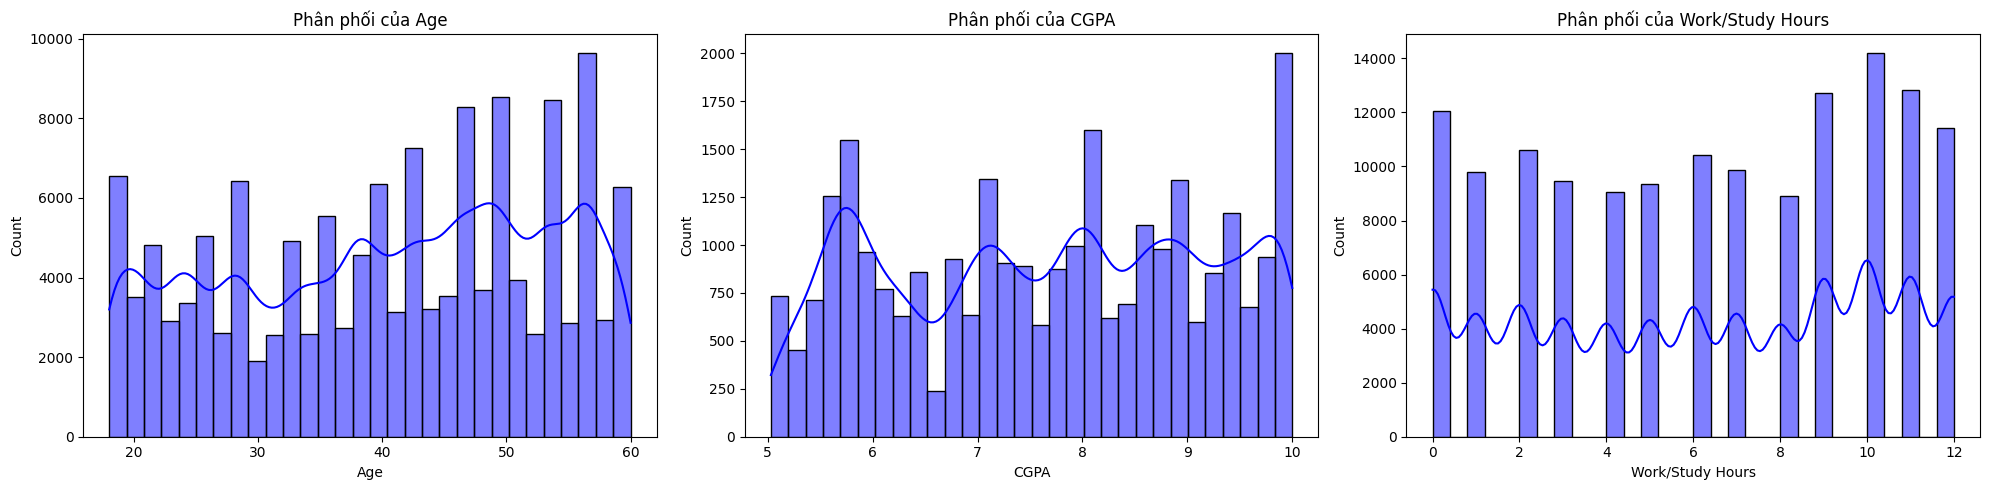

In [8]:
# Phân phối các biến số theo Depression
numeric_cols = ['Age', 'CGPA', 'Work/Study Hours']

fig, axes = plt.subplots(1, 3, figsize=(20, 5))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df_train[col], kde=True, bins=30, ax=axes[i], color='blue')
    axes[i].set_title(f"Phân phối của {col}")

plt.tight_layout()
plt.show()

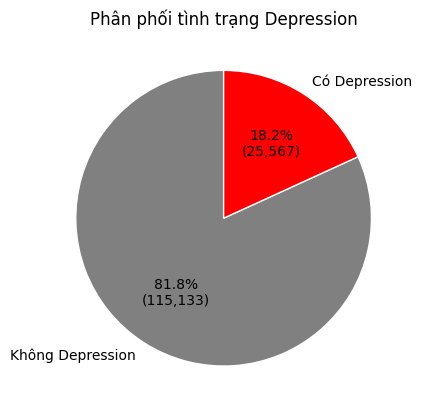

In [9]:
# Phân phối tình trạng Depression

depression_counts = df_train[target].value_counts()

# Tạo nhãn hiển thị số lượng + %
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f"{pct:.1f}%\n({val:,})"
    return my_autopct

plt.pie(
    depression_counts,
    autopct=make_autopct(depression_counts),
    labels=['Không Depression', 'Có Depression'],
    startangle=90,
    colors=['gray', 'red'],
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)

plt.title("Phân phối tình trạng Depression")
plt.show()

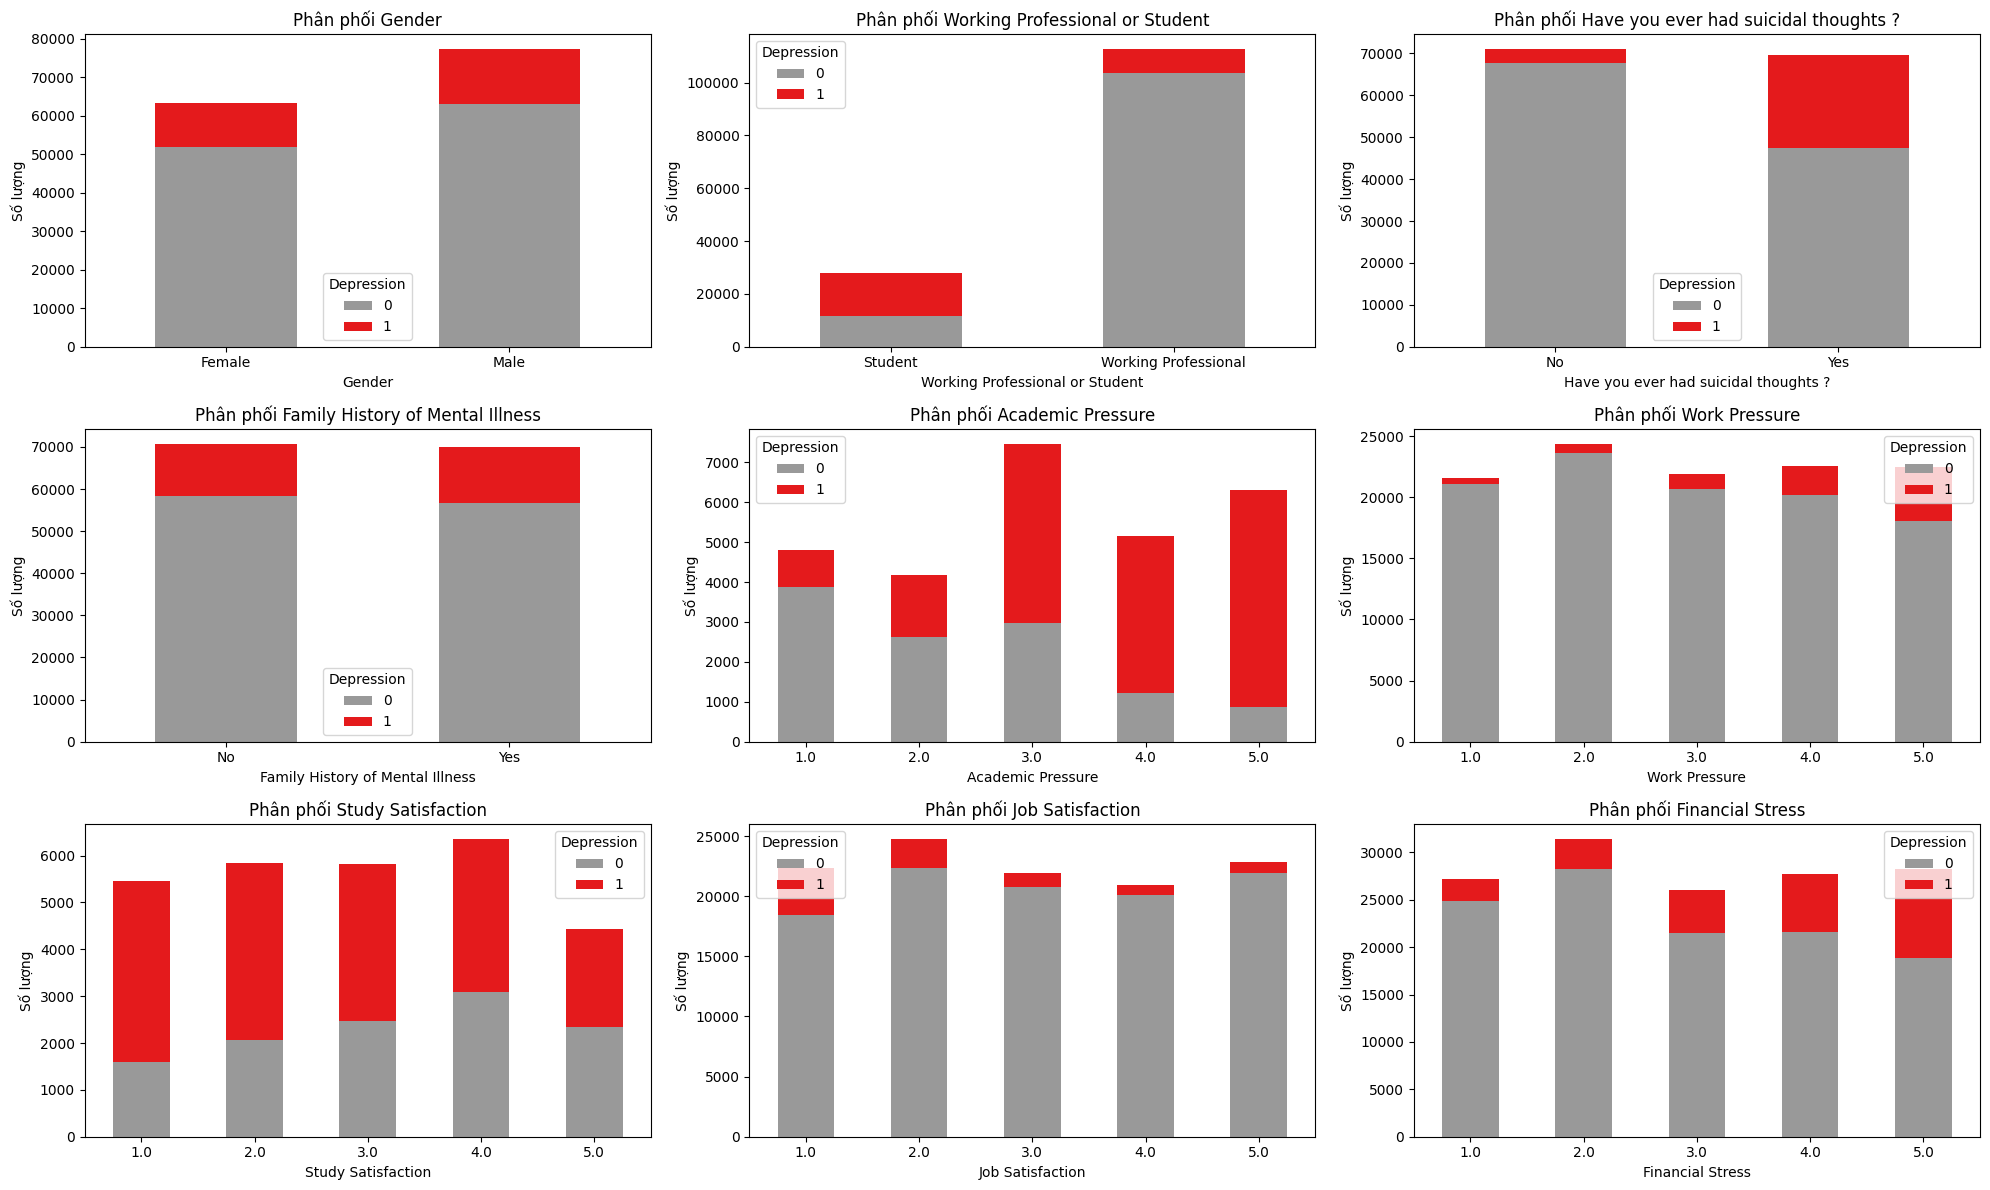

In [10]:
# Phân phối các biến phân loại theo Depression

fig, axes = plt.subplots(3, 3, figsize=(20, 12))
axes = axes.flatten()
categorical_cols_for_plot = ['Gender', 'Working Professional or Student', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness',
                             'Academic Pressure', 'Work Pressure', 'Study Satisfaction', 'Job Satisfaction', 'Financial Stress']

for i, col in enumerate(categorical_cols_for_plot):
    dist = pd.crosstab(df_train[col], df_train[target])
    dist.plot(kind='bar', stacked=True, figsize=(20,12), colormap='Set1_r', ax=axes[i])

    axes[i].set_title(f"Phân phối {col}")
    axes[i].set_ylabel('Số lượng')
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

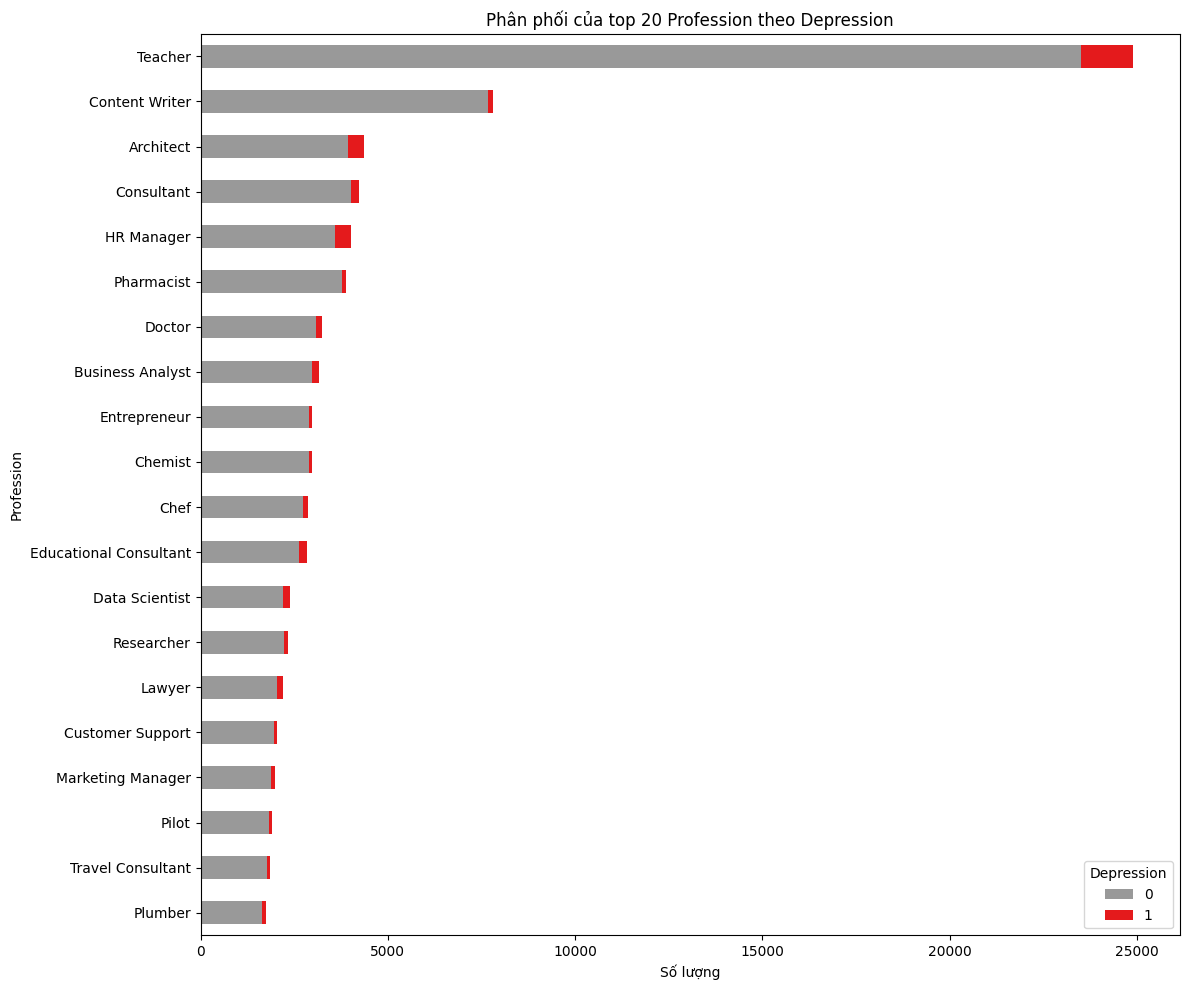

In [11]:
# Phân phối của top 20 Profession theo Depression
top_professions = df_train['Profession'].value_counts().head(20).index
profession_depression = pd.crosstab(df_train[df_train['Profession'].isin(top_professions)]['Profession'], 
                                     df_train[df_train['Profession'].isin(top_professions)][target])

# Sắp xếp theo tổng số lượng
profession_depression['Total'] = profession_depression.sum(axis=1)
profession_depression = profession_depression.sort_values('Total', ascending=True).drop('Total', axis=1)

profession_depression.plot(kind='barh', stacked=True, colormap='Set1_r', figsize=(12, 10))
plt.title('Phân phối của top 20 Profession theo Depression')
plt.xlabel('Số lượng')
plt.ylabel('Profession')
plt.tight_layout()
plt.show()

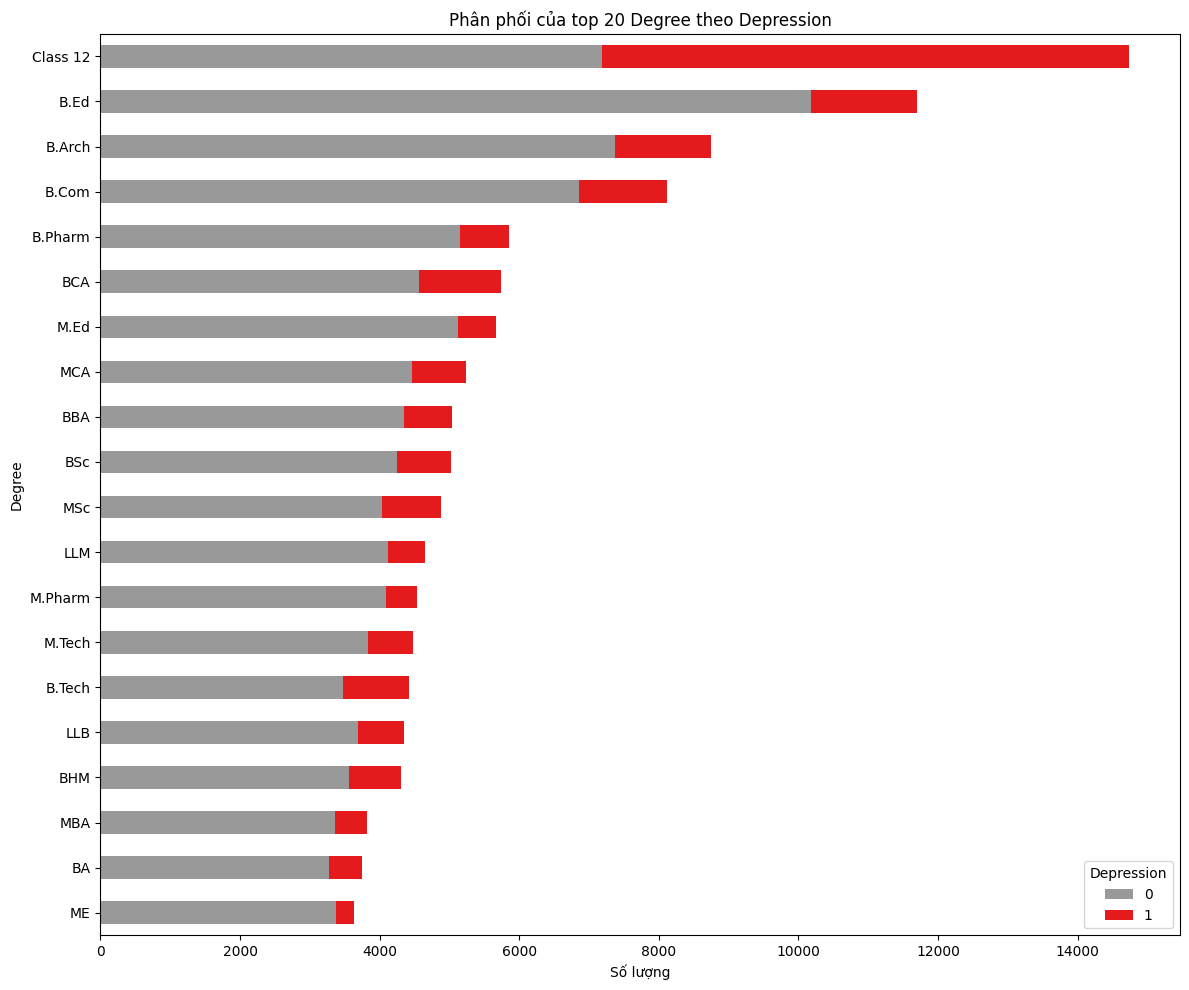

In [12]:
# Phân phối của top 20 Degree theo Depression
top_degrees = df_train['Degree'].value_counts().head(20).index
degree_depression = pd.crosstab(df_train[df_train['Degree'].isin(top_degrees)]['Degree'], 
                                 df_train[df_train['Degree'].isin(top_degrees)][target])

# Sắp xếp theo tổng số lượng
degree_depression['Total'] = degree_depression.sum(axis=1)
degree_depression = degree_depression.sort_values('Total', ascending=True).drop('Total', axis=1)

degree_depression.plot(kind='barh', stacked=True, colormap='Set1_r', figsize=(12, 10))
plt.title('Phân phối của top 20 Degree theo Depression')
plt.xlabel('Số lượng')
plt.ylabel('Degree')
plt.tight_layout()
plt.show()

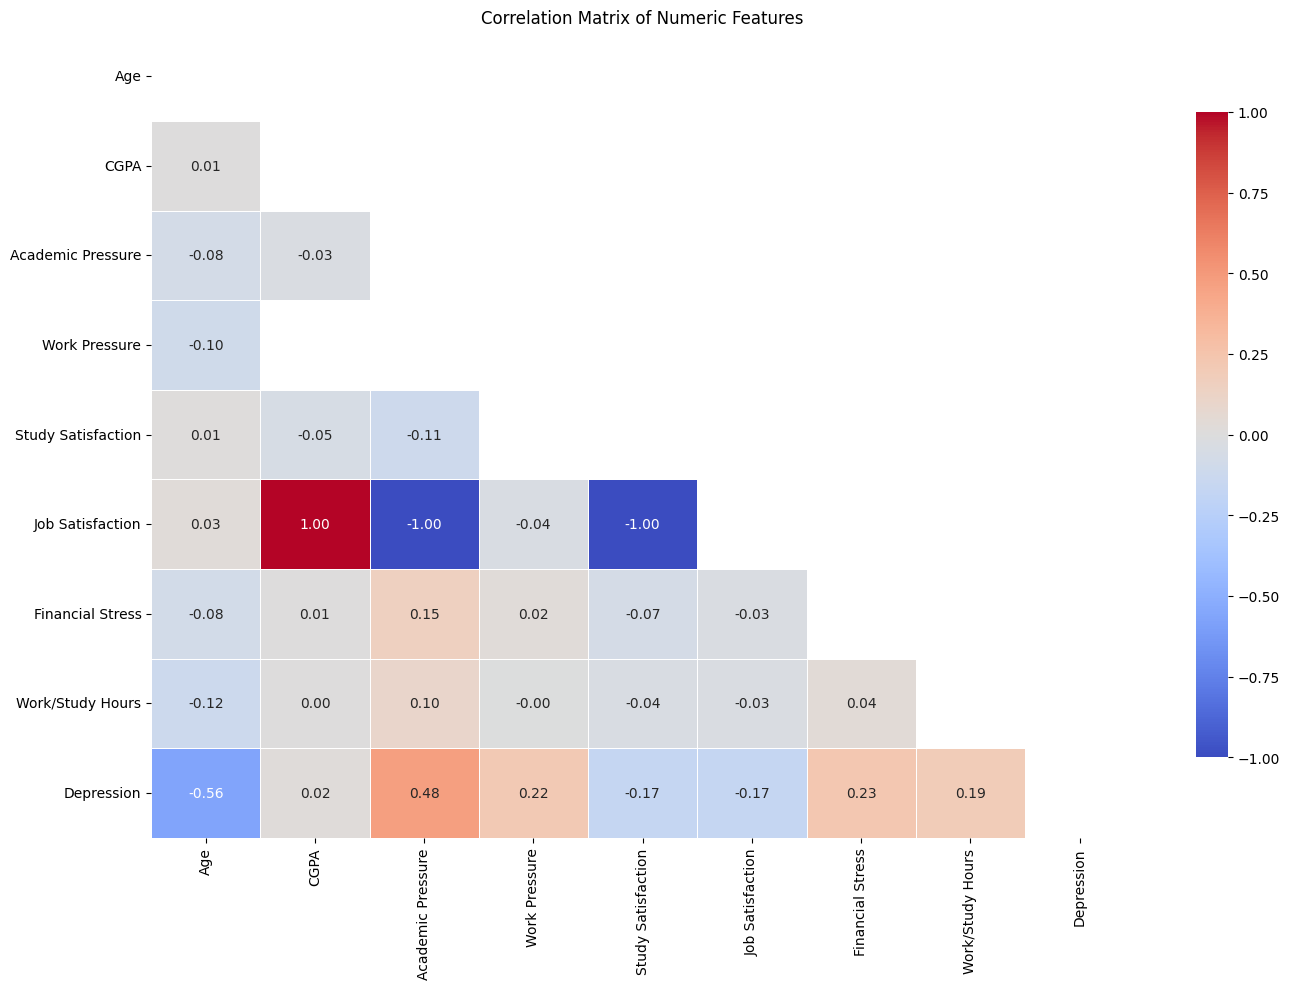

In [13]:
# Ma trận tương quan
cols_for_corr = ['Age', 'CGPA', 'Academic Pressure', 'Work Pressure', 'Study Satisfaction', 'Job Satisfaction',
                 'Financial Stress', 'Work/Study Hours', 'Depression']
corr = df_train[cols_for_corr].corr(method='pearson')

plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask=mask, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5, cbar_kws={'shrink': .8})
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

# Xử lý dữ liệu bị thiếu

In [14]:
df_train.isnull().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

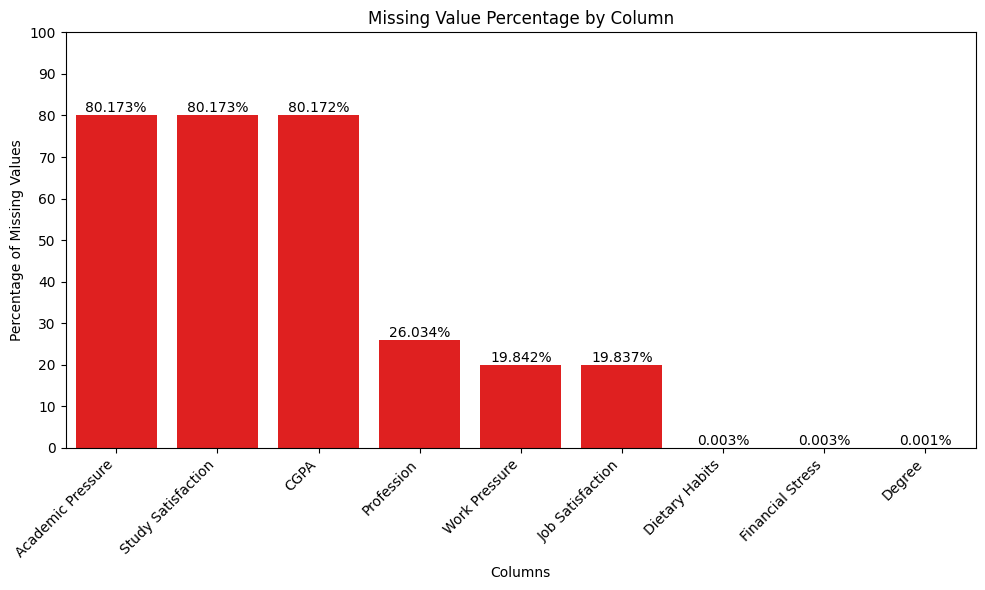

In [89]:
# Visualize missing data
missing_values_percentage = np.round(df_train.isna().mean()*100, 3)
missing_values_percentage = missing_values_percentage[missing_values_percentage > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=missing_values_percentage.index, y=missing_values_percentage.values, color='red')
plt.title('Missing Value Percentage by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.yticks(np.arange(0, 101, 10))
plt.xticks(rotation=45, ha='right')

# Thêm số phần trăm
for i, v in enumerate(missing_values_percentage.values):
    ax.text(i, v, str(v) + '%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [65]:
df_train['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
3-4 hours               12
6-7 hours                8
4-5 hours                7
4-6 hours                5
2-3 hours                5
6-8 hours                4
No                       4
1-6 hours                4
10-11 hours              2
9-11 hours               2
8-9 hours                2
Sleep_Duration           2
Unhealthy                2
45                       2
40-45 hours              1
1-2 hours                1
1-3 hours                1
9-6 hours                1
55-66 hours              1
Moderate                 1
35-36 hours              1
8 hours                  1
10-6 hours               1
Indore                   1
than 5 hours             1
49 hours                 1
Work_Study_Hours         1
3-6 hours                1
45-48 hours              1
9-5                      1
Pune                     1
9-5 hours                1
Name: count, 

In [66]:
df_train['Dietary Habits'].value_counts()

Dietary Habits
Moderate             49705
Unhealthy            46227
Healthy              44741
Yes                      2
More Healthy             2
No                       2
Pratham                  1
Gender                   1
BSc                      1
Less than Healthy        1
3                        1
1.0                      1
Hormonal                 1
Electrician              1
Mihir                    1
No Healthy               1
Less Healthy             1
M.Tech                   1
Vegas                    1
Male                     1
Indoor                   1
Class 12                 1
2                        1
Name: count, dtype: int64

In [67]:
# Mã hóa các biến phân loại thành số
gender={
    'Male':1,
    'Female':0,
}

work={
    'Working Professional':1,
    'Student':0,
}

suicidal_thought={
    'Yes':1,
    'No':0,
}

family_history={
    'Yes':1,
    'No':0,
}

sleep={
    'Less than 5 hours':4,
    '7-8 hours':7.5,
    'More than 8 hours':9, 
    '5-6 hours':5.5,
    '3-4 hours':3.5,
}

diet={
    'Healthy':2,
    'Moderate':1,
    'Unhealthy':0,   
}

# Xử lý dữ liệu train
df_train['Gender'] = df_train['Gender'].map(gender)
df_train['Working Professional or Student'] = df_train['Working Professional or Student'].map(work)
df_train['Have you ever had suicidal thoughts ?'] = df_train['Have you ever had suicidal thoughts ?'].map(suicidal_thought)
df_train['Family History of Mental Illness'] = df_train['Family History of Mental Illness'].map(family_history)
df_train['Sleep Duration'] = df_train['Sleep Duration'].map(sleep)
df_train['Dietary Habits'] = df_train['Dietary Habits'].map(diet)

# Xử lý dữ liệu test
df_test['Gender'] = df_test['Gender'].map(gender)
df_test['Working Professional or Student'] = df_test['Working Professional or Student'].map(work)
df_test['Have you ever had suicidal thoughts ?'] = df_test['Have you ever had suicidal thoughts ?'].map(suicidal_thought)
df_test['Family History of Mental Illness'] = df_test['Family History of Mental Illness'].map(family_history)
df_test['Sleep Duration'] = df_test['Sleep Duration'].map(sleep)
df_test['Dietary Habits'] = df_test['Dietary Habits'].map(diet)

In [68]:
# Gán Academic Pressure = 0 nếu là Working Professional và giá trị bị thiếu
# Xử lý dữ liệu train
df_train['Academic Pressure'] = np.where(
    (df_train['Working Professional or Student'] == 1) & (df_train['Academic Pressure'].isna()),
    0,
    df_train['Academic Pressure']
)
# Xử lý dữ liệu test
df_test['Academic Pressure'] = np.where(
    (df_test['Working Professional or Student'] == 1) & (df_test['Academic Pressure'].isna()),
    0,
    df_test['Academic Pressure']
)


# Gán Work Pressure = 0 nếu là Student và giá trị bị thiếu
# Xử lý dữ liệu train
df_train['Work Pressure'] = np.where(
    (df_train['Working Professional or Student'] == 0) & (df_train['Work Pressure'].isna()),
    0,
    df_train['Work Pressure']
)
# Xử lý dữ liệu test
df_test['Work Pressure'] = np.where(
    (df_test['Working Professional or Student'] == 0) & (df_test['Work Pressure'].isna()),
    0,
    df_test['Work Pressure']
)

In [69]:
# Gán Study Satisfaction = 0 nếu là Working Professional và giá trị bị thiếu
# Xử lý dữ liệu train
df_train['Study Satisfaction'] = np.where(
    (df_train['Working Professional or Student'] == 1) & (df_train['Study Satisfaction'].isna()),
    0,
    df_train['Study Satisfaction']
)
# Xử lý dữ liệu test
df_test['Study Satisfaction'] = np.where(
    (df_test['Working Professional or Student'] == 1) & (df_test['Study Satisfaction'].isna()),
    0,
    df_test['Study Satisfaction']
)



# Gán Job Satisfaction = 0 nếu là Student và giá trị bị thiếu
# Xử lý dữ liệu train
df_train['Job Satisfaction'] = np.where(
    (df_train['Working Professional or Student'] == 0) & (df_train['Job Satisfaction'].isna()),
    0,
    df_train['Job Satisfaction']
)
# Xử lý dữ liệu test
df_test['Job Satisfaction'] = np.where(
    (df_test['Working Professional or Student'] == 0) & (df_test['Job Satisfaction'].isna()),
    0,
    df_test['Job Satisfaction']
)

In [ ]:
df_train.isna().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                             9
Work Pressure                                20
CGPA                                     112802
Study Satisfaction                           10
Job Satisfaction                             17
Sleep Duration                               67
Dietary Habits                               27
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [ ]:
df_test.isna().sum()

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                               24632
Academic Pressure                            7
Work Pressure                               10
CGPA                                     75034
Study Satisfaction                           8
Job Satisfaction                             9
Sleep Duration                              51
Dietary Habits                              30
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

In [72]:
# Xử lí dữ liệu bị thiếu còn lại
categorical_cols = ['Academic Pressure', 'Work Pressure', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Financial Stress']
numeric_cols = ['Age', 'CGPA', 'Work/Study Hours']

# Dùng trung vị để điền vào các cột số
for col in numeric_cols:
    med=df_train[col].median()
    df_train = df_train.fillna({col:med}) # Điền cho train
    df_test = df_test.fillna({col:med}) # Điền cho test

# Dùng mode để điền vào các cột thứ bậc
for col in categorical_cols:
    df_train[col] = df_train[col].fillna(df_train[col].mode()[0]) # Điền cho train
    df_test[col] = df_test[col].fillna(df_test[col].mode()[0]) # Điền cho test

# Dùng 'missing' để điền vào các giá trị còn lại
df_train = df_train.fillna(value='missing') # Điền cho train
df_test = df_test.fillna(value='missing') # Điền cho test

In [ ]:
df_train.isna().sum()

id                                       0
Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [ ]:
df_test.isna().sum()

id                                       0
Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
dtype: int64